In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/titanic/test.csv")
df_sample_sub=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
df_train.shape

(891, 12)

In [4]:
df_id=df_train['PassengerId']
del df_train['PassengerId']
df_test_id=df_test['PassengerId']
del df_test['PassengerId']

In [5]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age']=df_test['Age'].fillna(df_train['Age'].mean())
df_train['Fare']=df_train['Fare'].fillna(df_train['Fare'].mean())
df_test['Fare']=df_test['Fare'].fillna(df_train['Fare'].mean())

In [6]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
import seaborn as sns

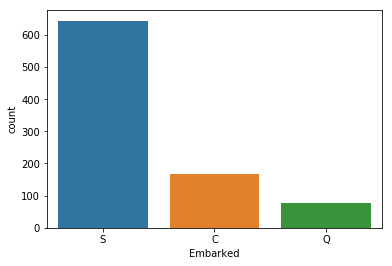

In [8]:
sns.countplot(df_train['Embarked'])

In [9]:
df_train['Embarked']=df_train['Embarked'].fillna("S")

In [10]:
del df_train['Cabin']
del df_train['Name']
del df_train['Ticket']
del df_test['Cabin']
del df_test['Name']
del df_test['Ticket']

In [11]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


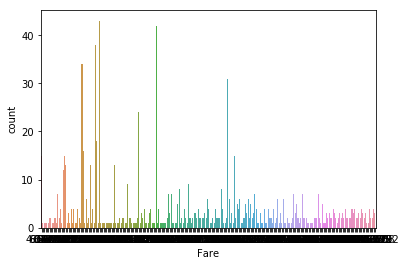

In [12]:
sns.countplot(df_train['Fare'])

del df_train['Fare']
del df_test['Fare']

In [13]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
Y=df_train['Survived']
del df_train['Survived']

In [15]:
Pclass=pd.get_dummies(df_train['Pclass'])
Sex=pd.get_dummies(df_train['Sex'])
Embarked=pd.get_dummies(df_train['Embarked'])

In [16]:
Pclass_test=pd.get_dummies(df_test['Pclass'])
Sex_test=pd.get_dummies(df_test['Sex'])
Embarked_test=pd.get_dummies(df_test['Embarked'])

In [17]:
df_train=pd.concat([df_train,Pclass,Sex,Embarked], axis=1, join='inner')
df_test=pd.concat([df_test,Pclass_test,Sex_test,Embarked_test], axis=1, join='inner')

In [18]:
del df_train['Pclass']
del df_train['Sex']
del df_train['Embarked']
del df_test['Pclass']
del df_test['Sex']
del df_test['Embarked']

In [19]:
df_train.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [20]:
df_test.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [21]:
df_train.shape

(891, 12)

In [22]:
df_test.shape

(418, 12)

In [23]:
df_train.dtypes

Age       float64
SibSp       int64
Parch       int64
Fare      float64
1           uint8
2           uint8
3           uint8
female      uint8
male        uint8
C           uint8
Q           uint8
S           uint8
dtype: object

In [24]:
df_test.dtypes

Age       float64
SibSp       int64
Parch       int64
Fare      float64
1           uint8
2           uint8
3           uint8
female      uint8
male        uint8
C           uint8
Q           uint8
S           uint8
dtype: object

In [25]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [26]:
logisticRegr.fit(df_train, Y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions = logisticRegr.predict(df_test)

In [28]:
new_series = pd.Series(predictions)

In [29]:
df_sample_sub['Survived']=new_series

In [30]:
df_sample_sub.to_csv('submission.csv',index=False)